## 回家作業
當銀行收到貸款申請時，必須根據客戶的個人檔案決定是否應該要核准貸款

如果客戶信用良好，批准貸款 如果客戶信用較差，不批准貸款 透過分析目的，可降低銀行風險、提升潛在獲利

現有一資料集 Creditability (https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv)


請用Python 回答以下問題

- 使用Pandas 將資料讀取到一名為 df 的 DataFrame 中
- 請使用Pandas 統計男女別的平均 Credit.Amount
- 請使用邏輯式迴歸建立模型 (目標 y 為 Creditability)
- 請計算出模型準確度(Accuracy)?

In [2]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv', index_col = 0)

In [3]:
df.head()

,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,1,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,0,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,0,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,0,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,1,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [4]:
## SELECT Sex...Marital.Status, AVG(Credit.Amount	) FROM df GROUP BY Sex...Marital.Status;
df.groupby('Sex...Marital.Status')['Credit.Amount'].mean()

Sex...Marital.Status
1    2896.327684
2    3694.981685
3    1993.360000
Name: Credit.Amount, dtype: float64

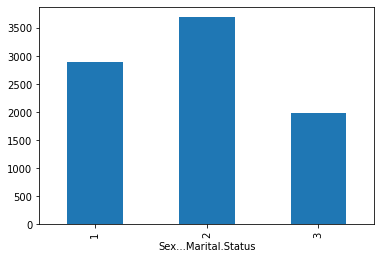

In [5]:
df.groupby('Sex...Marital.Status')['Credit.Amount'].mean().plot(kind = 'bar')

In [6]:
df.isna().sum()

Creditability                        0
Account.Balance                      0
Duration.of.Credit..month.           0
Payment.Status.of.Previous.Credit    0
Purpose                              0
Credit.Amount                        0
Value.Savings.Stocks                 0
Length.of.current.employment         0
Instalment.per.cent                  0
Sex...Marital.Status                 0
Guarantors                           0
Duration.in.Current.address          0
Most.valuable.available.asset        0
Age..years.                          0
Concurrent.Credits                   0
Type.of.apartment                    0
No.of.Credits.at.this.Bank           0
Occupation                           0
No.of.dependents                     0
Telephone                            0
Foreign.Worker                       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 497 to 385
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      500 non-null    int64
 1   Account.Balance                    500 non-null    int64
 2   Duration.of.Credit..month.         500 non-null    int64
 3   Payment.Status.of.Previous.Credit  500 non-null    int64
 4   Purpose                            500 non-null    int64
 5   Credit.Amount                      500 non-null    int64
 6   Value.Savings.Stocks               500 non-null    int64
 7   Length.of.current.employment       500 non-null    int64
 8   Instalment.per.cent                500 non-null    int64
 9   Sex...Marital.Status               500 non-null    int64
 10  Guarantors                         500 non-null    int64
 11  Duration.in.Current.address        500 non-null    int64
 12  Most.valuable.availa

In [8]:
y = df.iloc[:,0]
y.head()

497    1
756    0
580    0
833    0
602    1
Name: Creditability, dtype: int64

In [9]:
X = df.iloc[:,1:]
X.head()

,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
497,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
756,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
580,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
833,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
602,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
pred_y = clf.predict(X)

In [12]:
(y == pred_y ).sum() / len(y)

0.798

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y, pred_y)

0.798

In [14]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
clf1 = RandomForestClassifier()
clf1.fit(X,y)

clf2 = GradientBoostingClassifier()
clf2.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
pred_y1 = clf1.predict(X)
pred_y2 = clf2.predict(X)

In [16]:
accuracy_score(y, pred_y1)

1.0

In [17]:
accuracy_score(y, pred_y2)

0.93

In [18]:
len(X.columns)

20

## 主成分分析

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

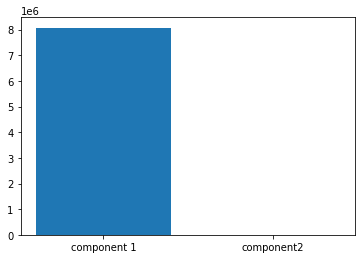

In [43]:
from matplotlib import pyplot as plt
plt.bar(range(0,2), pca.explained_variance_)
plt.xticks(range(0,2), ['component 1', 'component2'])
plt.show()

In [21]:
pca.components_

array([[-2.01956244e-05,  2.50391428e-03,  1.47920110e-06,
        -3.24785057e-05,  9.99996827e-01,  1.59499249e-05,
        -1.23836860e-05, -1.10911984e-04, -3.06591799e-07,
        -8.00839718e-07,  2.23847060e-07,  1.22174890e-04,
         2.07536079e-04, -1.02078733e-05,  2.99376044e-05,
        -6.92305176e-06,  0.00000000e+00,  2.60308900e-06,
         4.91638374e-05,  2.19567447e-06],
       [ 3.53109045e-03, -3.60650139e-01,  8.83228175e-03,
         2.08452770e-03,  7.08734090e-04,  5.64788028e-03,
         2.33625552e-02, -3.19690353e-03, -4.60170388e-04,
        -1.86162595e-03,  2.25534209e-02,  1.35546189e-03,
         9.31926664e-01, -1.25463196e-03,  1.26317664e-02,
         4.85036445e-03,  0.00000000e+00,  4.21784989e-03,
         6.61197481e-03,  7.58475874e-04]])

In [22]:
X_reduced = pca.transform(X)
X_reduced.shape

(500, 2)

In [23]:
X_reduced[0:3]

array([[-1.13413283e+03, -1.24062275e+00],
       [-2.29210577e+03, -1.54152988e+00],
       [ 3.93194164e+03, -9.65273810e+00]])

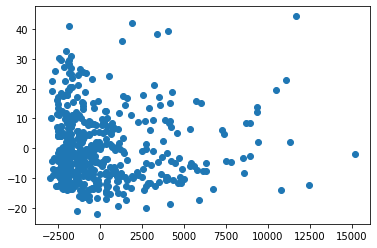

In [24]:
from matplotlib import pyplot as plt
plt.scatter(X_reduced[:,0],X_reduced[:,1])

In [38]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_reduced,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1

In [40]:
import numpy as np
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),np.arange(y_min, y_max, 1))

In [41]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Text(0, 0.5, 'Component 2')

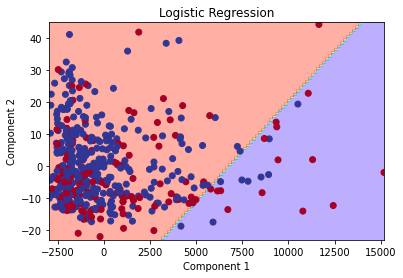

In [42]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Logistic Regression')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_reduced,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Text(0, 0.5, 'Component 2')

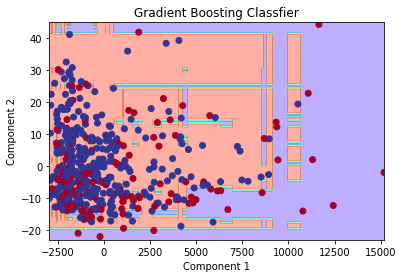

In [34]:
import numpy as np
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),np.arange(y_min, y_max, 1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('Gradient Boosting Classfier')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

In [28]:
pred_y = clf.predict(X_reduced)

In [29]:
accuracy_score(y, pred_y)

0.862

In [32]:
from sklearn.metrics import confusion_matrix
clf.classes_
confusion_matrix(y,pred_y)

array([[ 74,  69],
       [  0, 357]])

In [33]:
df['Creditability'].value_counts()

1    357
0    143
Name: Creditability, dtype: int64

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(X_reduced[:,0:1],y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [46]:
pred_y = clf.predict(X_reduced[:,0:1])

In [47]:
accuracy_score(y, pred_y)

0.822

## 類神經網路

In [49]:
import numpy as np
X = np.array([20, 1000, 3])

In [51]:
W1 = np.random.randn(3,4)
W1

array([[-1.36743439, -1.18785915, -0.90434638, -0.10332626],
       [ 1.13442268,  0.14199281, -1.02603955,  0.73104353],
       [ 0.21465623, -0.92159102, -1.36470448, -0.17500917]])

In [57]:
O1 = np.dot(X,W1)
O1

array([ 1107.71795904,   115.47085527, -1048.22059293,   728.45197542])

In [56]:
def relu(e):
  return np.maximum(e,0)

relu(np.array([-2,-1,2]))

array([0, 0, 2])

In [58]:
relu(O1)

array([1107.71795904,  115.47085527,    0.        ,  728.45197542])

In [59]:
W2 = np.random.randn(4,1)

In [60]:
np.dot(O1, W2)

array([-1042.13685833])

## MNIST

In [62]:
from sklearn.datasets import load_digits
digits = load_digits()

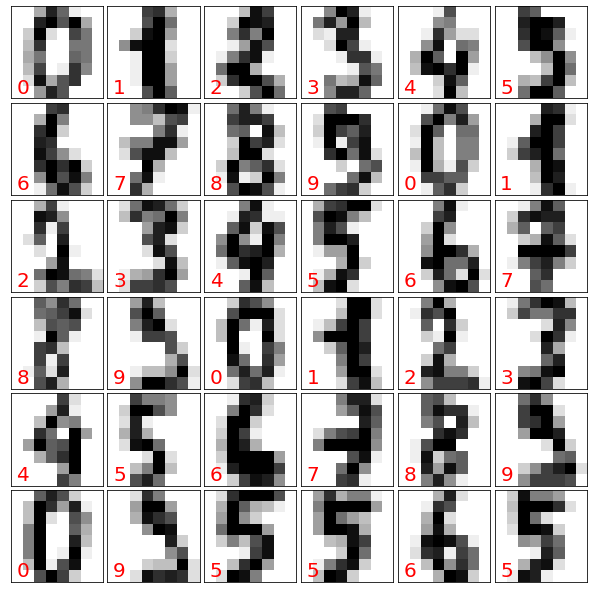

In [64]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (8,8))

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(36):
  ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
  ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
  ax.text(0, 7, str(digits.target[i]), color="red", fontsize = 20)

In [66]:
digits.data.shape

(1797, 64)

In [67]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [68]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

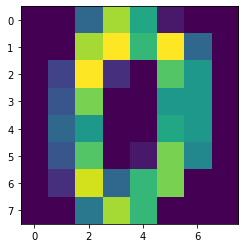

In [71]:
plt.imshow(digits.data[0].reshape(8,8))

In [72]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [76]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 3000)
clf.fit(digits.data, digits.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
pred_y = clf.predict(digits.data)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, pred_y)

1.0

In [207]:
from sklearn.preprocessing import StandardScaler
a = np.array([[50],[60],[70]])
sc = StandardScaler()
sc.fit_transform(a)

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [208]:
(a - a.mean()) / a.std()

array([[-1.22474487],
       [ 0.        ],
       [ 1.22474487]])

In [209]:
sc.transform(np.array([[90]]))

array([[3.67423461]])

In [149]:
scaler = StandardScaler()
scaler.fit(digits.data)
X_scaled = scaler.transform(digits.data)

In [191]:
# X:64 -> L1:30 -> L2:30 -> L3:30 -> Output:10
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier((30,30,30), max_iter = 3000)
clf.fit(X_scaled, digits.target)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=3000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [192]:
pred_y = clf.predict(X_scaled)

In [193]:
accuracy_score(digits.target, pred_y)

1.0

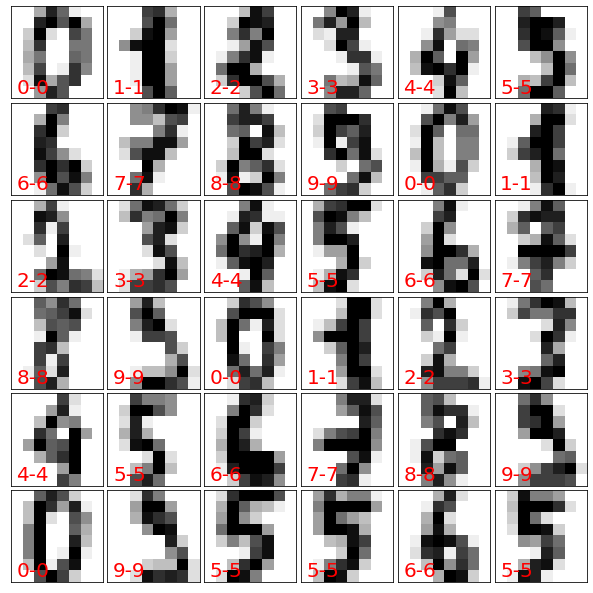

In [194]:
predicted = clf.predict(X_scaled)
fig = plt.figure(figsize = (8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(36):
  ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
  ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
  ax.text(0, 7, str('{}-{}'.format(digits.target[i],predicted[i])), color="red", fontsize = 20)

In [195]:
clf.coefs_[0].shape

(64, 30)

In [196]:
clf.coefs_[1].shape

(30, 30)

In [197]:
clf.coefs_[2].shape

(30, 30)

In [198]:
clf.coefs_[3].shape

(30, 10)

In [199]:
clf.coefs_[0]

array([[ 8.14930642e-05,  1.78141891e-06,  1.47899090e-07, ...,
         1.43087621e-15, -3.27797486e-04, -2.81232816e-15],
       [-6.50742128e-02, -1.29047155e-01, -2.87267903e-01, ...,
        -4.86836133e-02,  1.89973756e-01, -2.23742999e-01],
       [-7.73804997e-02, -1.85234077e-02, -1.21470929e-01, ...,
        -6.26812109e-02, -2.58308920e-01, -1.02878863e-01],
       ...,
       [-3.37713982e-01,  2.68978283e-01,  3.49641560e-02, ...,
         1.80806787e-01, -2.44526439e-01, -1.66626897e-01],
       [-3.07252266e-01, -9.45043270e-03,  7.45471432e-02, ...,
         1.37780155e-01, -2.48628263e-01, -2.72233098e-01],
       [-3.71016804e-01, -4.71416996e-02, -7.06769289e-03, ...,
        -3.95285530e-02,  1.24087429e-01, -1.96479133e-01]])

In [96]:
! wget https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/4.jpg

--2020-10-31 03:31:39--  https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/4.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 695 [image/jpeg]
Saving to: ‘4.jpg’

4.jpg               100%[===================>]     695  --.-KB/s    in 0s      

2020-10-31 03:31:39 (21.3 MB/s) - ‘4.jpg’ saved [695/695]



In [200]:
from PIL import Image
img = Image.open('4.jpg').convert('L')

In [201]:
import numpy as np
im = np.array(img)

In [202]:
im2 = ((255 - im) / 256 * 16).astype(int)

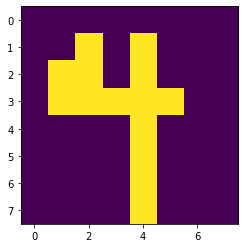

In [203]:
plt.imshow(im2)

In [204]:
im2 = im2.reshape((1,64))

In [205]:
im3 = scaler.transform(im2)

In [206]:
clf.predict(im3)

array([4])

In [189]:
im3.dtype

dtype('float64')

## 模型評估

In [211]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
predicted = clf.predict(iris.data)

In [217]:
sum(iris.target == predicted) / len(iris.target)

0.9733333333333334

In [218]:
# 1000  100
# 100  1000
100 * 500 * 24

1200000

In [219]:
2000 * 100

200000

In [221]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(iris.target, predicted)
print(clf.classes_)
m

[0 1 2]


array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

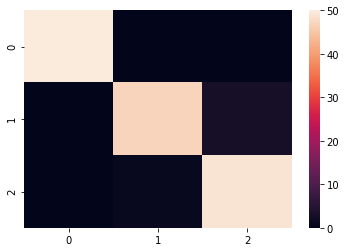

In [222]:
import seaborn
seaborn.heatmap(m)

In [223]:
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [225]:
clf.predict_proba(iris.data)[0:3]

array([[9.81801790e-01, 1.81981959e-02, 1.43556907e-08],
       [9.71727348e-01, 2.82726221e-02, 3.00307256e-08],
       [9.85451821e-01, 1.45481667e-02, 1.22669829e-08]])

In [226]:
from sklearn.metrics import classification_report
print(classification_report(iris.target, predicted))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [227]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1.fit(iris.data, iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [228]:
predicted1 = clf1.predict(iris.data)

In [229]:
accuracy_score(iris.target, predicted1)

1.0

In [230]:
confusion_matrix(iris.target, predicted1)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [232]:
from sklearn import tree
tree.export_graphviz(clf1, 'tree.dot')

In [234]:
! cat tree.dot

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]"] ;
1 [label="gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]"] ;
2 -> 3 ;
4 [label="X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]"] ;
4 -> 6 ;
7 [label="X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]"] ;
3 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]"] ;
7 -> 8 ;
9 [label="X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]"] ;
7 -> 9 ;
10 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]"] ;
9 -> 10 ;
11 [label="gini = 0.0\nsampl

- https://dreampuf.github.io/GraphvizOnline/

## 交叉驗證

In [235]:
X = iris.data
y = iris.target

In [236]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 123)

In [237]:
X.shape

(150, 4)

In [238]:
train_X.shape

(100, 4)

In [239]:
test_X.shape

(50, 4)

In [240]:
clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [244]:
pred_y1 = clf.predict(train_X)
accuracy_score(train_y, pred_y1)

1.0

In [245]:
pred_y = clf.predict(test_X)

In [246]:
accuracy_score(test_y, pred_y)

0.94

In [247]:
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(train_X, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [248]:
pred_y1 = clf.predict(train_X)
accuracy_score(train_y, pred_y1)

0.96

In [249]:
pred_y = clf.predict(test_X)
accuracy_score(train_y, pred_y1)

0.96

## K-Fold Cross Validation

In [250]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [252]:
accs = []
for train, test in kf.split(X):
  train_X, test_X, train_y, test_y = X[train],X[test], y[train], y[test]
  clf = DecisionTreeClassifier()
  clf.fit(train_X, train_y)
  predicted = clf.predict(test_X)
  acc = accuracy_score(test_y, predicted)
  accs.append(acc)

In [255]:
sum(accs) / len(accs)

0.9400000000000001

In [256]:
import numpy as np
np.array(accs).mean()

0.9400000000000001

In [257]:
np.array(accs).std()

0.08666666666666667

In [258]:
accs = []
for train, test in kf.split(X):
  train_X, test_X, train_y, test_y = X[train],X[test], y[train], y[test]
  clf = DecisionTreeClassifier(max_depth= 2)
  clf.fit(train_X, train_y)
  predicted = clf.predict(test_X)
  acc = accuracy_score(test_y, predicted)
  accs.append(acc)

In [259]:
import numpy as np
np.array(accs).mean()

0.9333333333333333

In [260]:
np.array(accs).std()

0.07888106377466153

In [261]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
acc = cross_val_score(clf, X=iris.data, y= iris.target, cv= 10)
acc

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [263]:
print(acc.mean())
print(acc.std())

0.9533333333333334
0.04268749491621898


In [266]:
from sklearn.model_selection import cross_val_score
clf1 = DecisionTreeClassifier(max_depth= 2)
acc = cross_val_score(clf1, X=iris.data, y= iris.target, cv= 10)
acc

array([0.93333333, 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.86666667, 1.        , 1.        , 1.        ])

In [267]:
print(acc.mean())
print(acc.std())

0.9466666666666667
0.04988876515698587


## ROC Curve

In [268]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [269]:
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [271]:
clf.predict_proba(iris.data)[0:3]

array([[9.81801790e-01, 1.81981959e-02, 1.43556907e-08],
       [9.71727348e-01, 2.82726221e-02, 3.00307256e-08],
       [9.85451821e-01, 1.45481667e-02, 1.22669829e-08]])

In [272]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
X = iris.data[50:,]
y = iris.target[50:]


In [275]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [277]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [279]:
pred_y = clf.predict(X)
confusion_matrix(y, pred_y)

array([[47,  3],
       [ 1, 49]])

In [285]:
pred_y = (clf.predict_proba(X)[:,1] >=0.5).astype(int)
confusion_matrix(y, pred_y)

array([[47,  3],
       [ 1, 49]])

In [286]:
pred_y = (clf.predict_proba(X)[:,1] >=0.1).astype(int)
confusion_matrix(y, pred_y)

array([[27, 23],
       [ 0, 50]])

In [287]:
pred_y = (clf.predict_proba(X)[:,1] >=0.3).astype(int)
confusion_matrix(y, pred_y)

array([[45,  5],
       [ 0, 50]])

In [288]:
pred_y = (clf.predict_proba(X)[:,1] >=0.7).astype(int)
confusion_matrix(y, pred_y)

array([[50,  0],
       [ 7, 43]])

In [ ]:
# TP FP
# FN TN

#TPR = TP / (TP+ FN)
#FPR = FP / (FP+ TN)

In [289]:
np.arange(0.1,1,0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [301]:
FPR_ary = [1]
TPR_ary = [1]
for t in np.arange(0.1,1,0.1):
  pred_y = (clf.predict_proba(X)[:,1] >=t).astype(int)
  m = confusion_matrix(y, pred_y)
  TP = m[0,0]
  FP = m[0,1]
  FN = m[1,0]
  TN = m[1,1]
  TPR = TP / (TP + FN)
  FPR = FP / (FP + TN)
  FPR_ary.append(FPR)
  TPR_ary.append(TPR)
FPR_ary.append(0)
TPR_ary.append(0)

In [302]:
FPR_ary

[1,
 0.3150684931506849,
 0.20634920634920634,
 0.09090909090909091,
 0.07407407407407407,
 0.057692307692307696,
 0.022222222222222223,
 0.0,
 0.0,
 0.0,
 0]

In [303]:
TPR_ary

[1,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9791666666666666,
 0.8909090909090909,
 0.8771929824561403,
 0.819672131147541,
 0.684931506849315,
 0]

In [304]:
import numpy as np
FPR_ary = np.array(FPR_ary)
TPR_ary = np.array(TPR_ary)

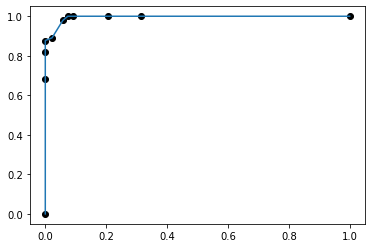

In [306]:
from matplotlib import pyplot as plt
plt.plot(FPR_ary, TPR_ary)
plt.scatter(FPR_ary, TPR_ary, c = 'black')

In [307]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])

In [308]:
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.08, 0.08,
       1.  ])

In [309]:
tpr

array([0.  , 0.02, 0.74, 0.78, 0.86, 0.86, 0.94, 0.94, 0.98, 0.98, 1.  ,
       1.  ])

In [310]:
thresholds

array([1.99906959e+00, 9.99069585e-01, 8.21361632e-01, 8.07659536e-01,
       7.31008441e-01, 6.52687677e-01, 5.54659072e-01, 5.37285790e-01,
       5.20258090e-01, 4.47035575e-01, 4.13541729e-01, 1.88003893e-03])

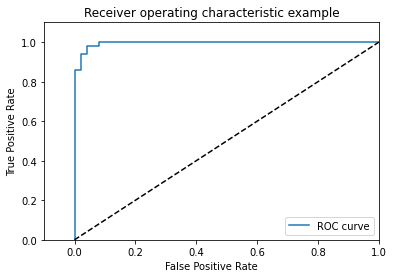

In [314]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.1, 1.0])
plt.ylim([0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [317]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [318]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
clf1 = DecisionTreeClassifier(max_depth = 2)
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

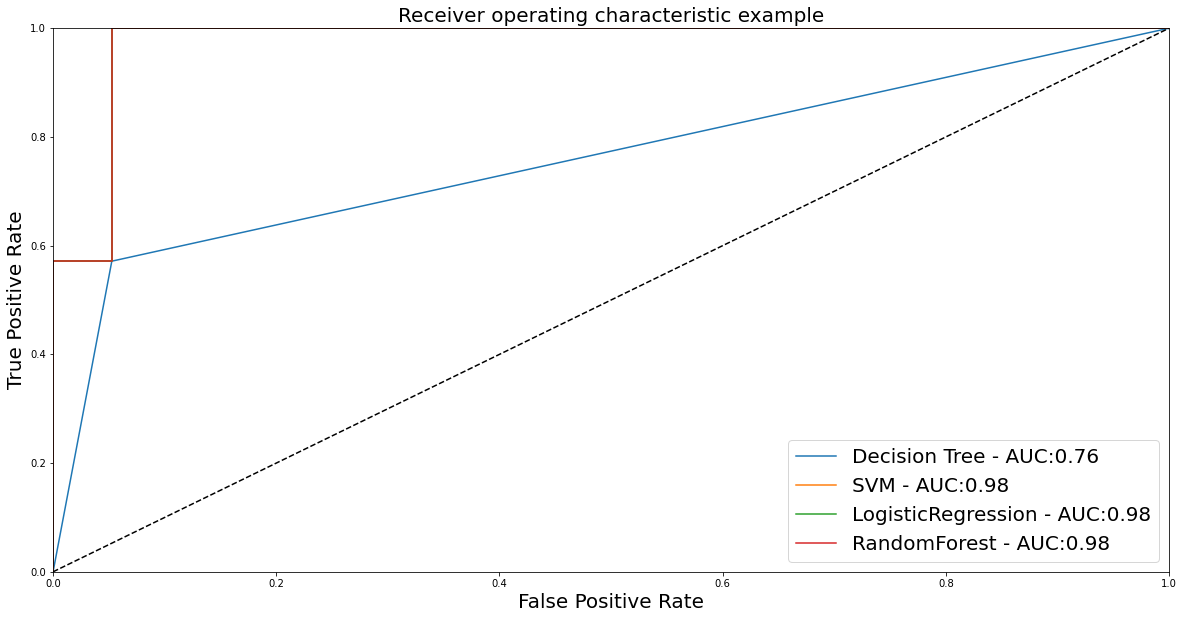

In [321]:
from sklearn.metrics import auc
plt.figure(figsize= [20,10])

for clf, title in zip([clf1,clf2,clf3, clf4], ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
  probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
  fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
  plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
  #plt.plot(fpr, tpr, label='%s'%(title) )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## Customer Churn Analysis

In [323]:
import pandas
df = pandas.read_csv('http://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customer_churn.csv', index_col = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [324]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [326]:
df = df.iloc[:,3:]

In [327]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [328]:
df.select_dtypes('object').head()

,international_plan,voice_mail_plan,churn
1,no,yes,no
2,no,yes,no
3,no,no,no
4,yes,no,no
5,yes,no,no


In [329]:
df['international_plan'].unique()

array(['no', 'yes'], dtype=object)

In [330]:
df['voice_mail_plan'].unique()

array(['yes', 'no'], dtype=object)

In [331]:
df['churn'].unique()

array(['no', 'yes'], dtype=object)

In [332]:
df['international_plan'] = df['international_plan'].replace({'yes':1, 'no':0})
df['voice_mail_plan'] = df['voice_mail_plan'].replace({'yes':1, 'no':0})
df['churn'] = df['churn'].replace({'yes':1, 'no':0})

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   international_plan             3333 non-null   int64  
 1   voice_mail_plan                3333 non-null   int64  
 2   number_vmail_messages          3333 non-null   int64  
 3   total_day_minutes              3333 non-null   float64
 4   total_day_calls                3333 non-null   int64  
 5   total_day_charge               3333 non-null   float64
 6   total_eve_minutes              3333 non-null   float64
 7   total_eve_calls                3333 non-null   int64  
 8   total_eve_charge               3333 non-null   float64
 9   total_night_minutes            3333 non-null   float64
 10  total_night_calls              3333 non-null   int64  
 11  total_night_charge             3333 non-null   float64
 12  total_intl_minutes             3333 non-null   f

In [334]:
X = df.iloc[:,:-1]

In [336]:
X.head(3)

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0


In [337]:
y = df.iloc[:,-1]

In [338]:
y.head(3)

1    0
2    0
3    0
Name: churn, dtype: int64

In [339]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [340]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

clf5 = GradientBoostingClassifier()
clf5.fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


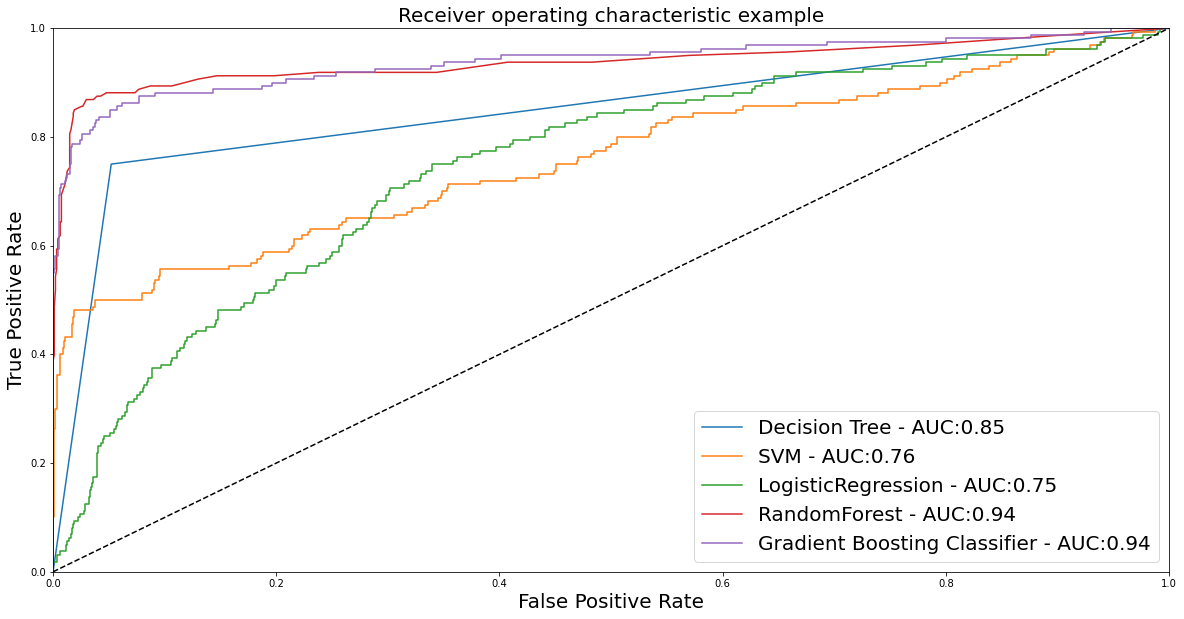

In [341]:
from sklearn.metrics import auc
plt.figure(figsize= [20,10])

for clf, title in zip([clf1,clf2,clf3, clf4, clf5], ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest', 'Gradient Boosting Classifier']):
  probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
  fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
  plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
  #plt.plot(fpr, tpr, label='%s'%(title) )

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

In [344]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [347]:
len(X.columns)

16

In [348]:
rf = RandomForestClassifier(criterion='gini', random_state=0)
maxFeatures = range(1,len(X.columns))
param_dist = dict(max_features=maxFeatures)
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
rand.fit(X,y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [356]:
rand.best_params_

{'max_features': 5}

In [357]:
rand.best_score_

0.9562038085990181

In [358]:
rand.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [359]:
rand.best_estimator_.feature_importances_

array([0.07999471, 0.02807632, 0.03084561, 0.15691952, 0.02941958,
       0.12491288, 0.07356073, 0.02568707, 0.07252532, 0.03971802,
       0.02928301, 0.03755588, 0.04256922, 0.0610862 , 0.04554681,
       0.12229913])

In [360]:
features = X.columns

Text(0, 0.5, 'Normalized Gini Importance')

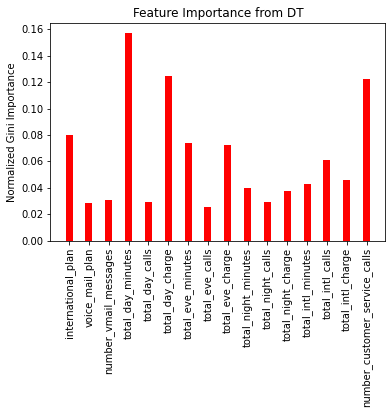

In [363]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(features)), rand.best_estimator_.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(rand.best_estimator_.feature_importances_)))
ax.set_xticklabels(X.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

## 分群方法

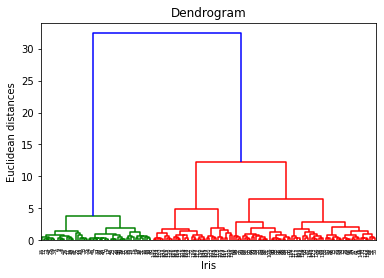

In [364]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(iris.data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
plt.show()

In [365]:
from sklearn.cluster import AgglomerativeClustering
hc  = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(iris.data)

In [383]:
y_hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [384]:
np.place(y_hc, y_hc == 1, -1)
np.place(y_hc, y_hc == 0, 1)
np.place(y_hc, y_hc == -1, 0)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

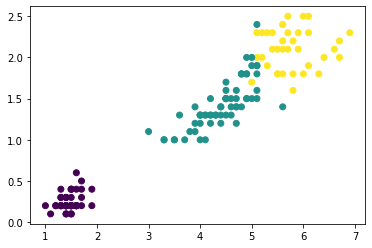

In [385]:
plt.scatter(iris.data[:,2],iris.data[:,3], c = y_hc)

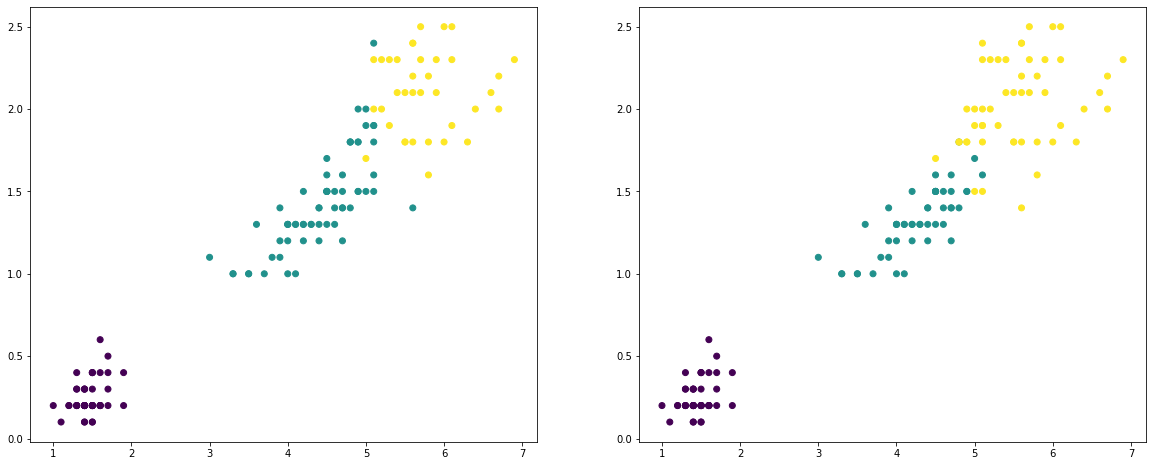

In [386]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(iris.data[:,2],iris.data[:,3], c = y_hc)

ax = fig.add_subplot(1, 2, 2)
ax.scatter(iris.data[:,2],iris.data[:,3], c = iris.target)

## K_Means

In [390]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state= 123)
y_kmeans = kmeans.fit_predict(iris.data)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [391]:
np.place(y_kmeans, y_kmeans == 1, -1)
np.place(y_kmeans, y_kmeans == 2, 1)
np.place(y_kmeans, y_kmeans == -1, 2)

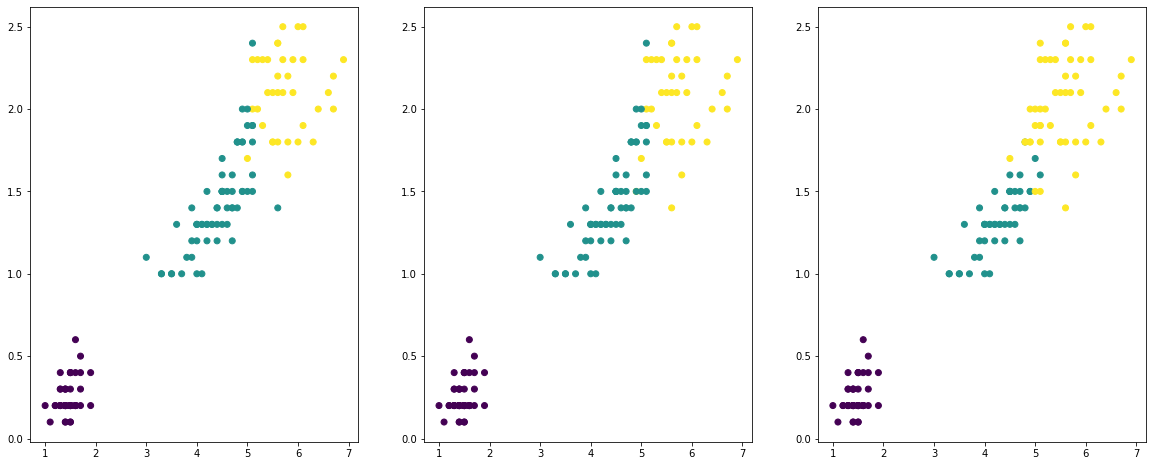

In [392]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(iris.data[:,2],iris.data[:,3], c = y_hc)

ax = fig.add_subplot(1, 3, 2)
ax.scatter(iris.data[:,2],iris.data[:,3], c = y_kmeans)

ax = fig.add_subplot(1, 3, 3)
ax.scatter(iris.data[:,2],iris.data[:,3], c = iris.target)

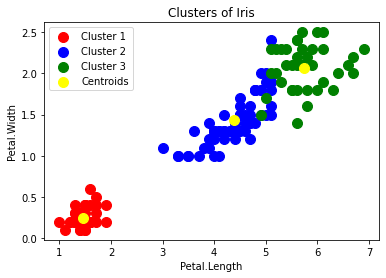

In [396]:
import matplotlib.pyplot as plt
plt.scatter(iris.data[y_kmeans == 0, 2], iris.data[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(iris.data[y_kmeans == 1, 2], iris.data[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(iris.data[y_kmeans == 2, 2], iris.data[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Iris')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.legend()
plt.show()

## 客戶分群

In [397]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customers.csv')

In [398]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [403]:
X  = df.iloc[:,[3,4]].values

In [404]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [405]:
y_kmeans

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

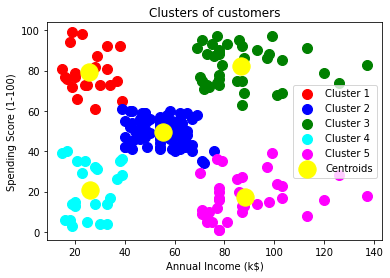

In [406]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow',
label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [407]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [408]:
df['Genre'] = df['Genre'].replace({'Male':1, 'Female':0})

In [409]:
X = df.iloc[:,1:].values

In [410]:
X[0:3]

array([[ 1, 19, 15, 39],
       [ 1, 21, 15, 81],
       [ 0, 20, 16,  6]])

In [411]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [412]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [415]:
df['Age']

0      19
1      21
2      20
3      23
4      31
       ..
195    35
196    45
197    32
198    32
199    30
Name: Age, Length: 200, dtype: int64

## 評估分群方法

In [416]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customers.csv')

In [417]:
X  = df.iloc[:,[3,4]].values

In [418]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [419]:
kmeans.inertia_

44448.45544793371

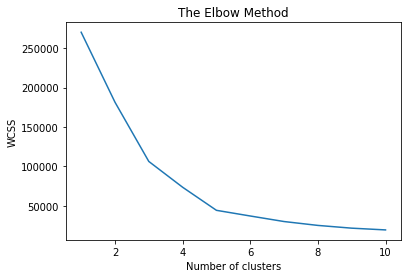

In [420]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [421]:
from sklearn.metrics import silhouette_score
print("Silhouette Coefficient: %0.3f" % silhouette_score(X, y_kmeans))

Silhouette Coefficient: 0.554


In [423]:
sil = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  y_kmeans = kmeans.fit_predict(X)
  sil.append(silhouette_score(X, y_kmeans))

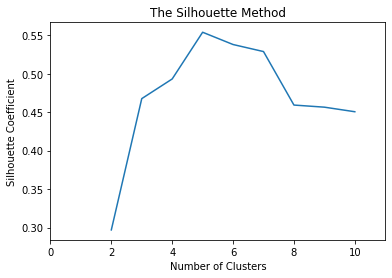

570

In [424]:
plt.plot(range(2, 11), sil)
plt.xlim([0,11])
plt.title('The Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()
570

In [425]:
# ward
ward = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_ward = ward.fit_predict(X)

#complete
complete = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'complete')
y_complete = complete.fit_predict(X)

# kmeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [426]:
for est, title in zip([y_ward,y_complete, y_kmeans], ['ward', 'complete', 'kmeans']):
  print(title ,silhouette_score(X, est))

ward 0.5529945955148897
complete 0.5529945955148897
kmeans 0.553931997444648


## DBSCAN

In [427]:
! wget https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/handwriting.png

--2020-10-31 09:09:49--  https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/handwriting.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 477 [image/png]
Saving to: ‘handwriting.png’

handwriting.png     100%[===================>]     477  --.-KB/s    in 0s      

2020-10-31 09:09:49 (14.7 MB/s) - ‘handwriting.png’ saved [477/477]



In [433]:
from PIL import Image
img = Image.open('handwriting.png').convert('L').rotate(-90)

In [434]:
img

In [435]:
import numpy as np
imgarr = np.array(img)

In [441]:
x,y = np.where((imgarr < 255).astype(int))

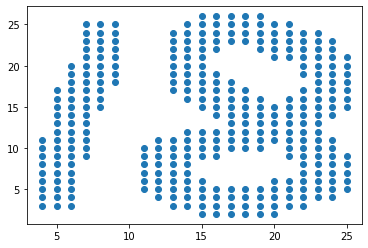

In [442]:
plt.scatter(x,y)

In [446]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
X = np.column_stack([x,y])

In [447]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state= 42)
y_kmeans = kmeans.fit_predict(X)

In [451]:
kmeans.cluster_centers_

array([[16.03164557, 19.7278481 ],
       [15.01219512,  7.76829268]])

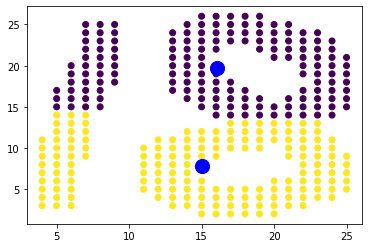

In [452]:
plt.scatter(x,y, c = y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'blue')

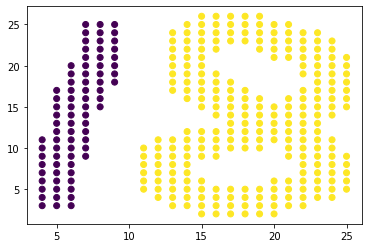

In [454]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=1, min_samples=3)
y_dbs = dbs.fit_predict(X)
plt.scatter(x,y,c = y_dbs)

In [456]:
from sklearn.cluster import AgglomerativeClustering
hc  = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

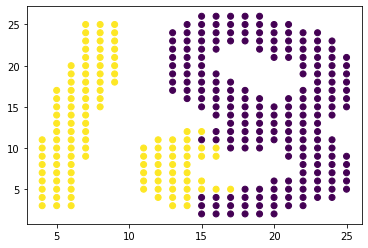

In [457]:
plt.scatter(x,y, c = y_hc)

## 作業¶

當銀行收到貸款申請時，必須根據客戶的個人檔案決定是否應該要核准貸款

如果客戶信用良好，批准貸款 如果客戶信用較差，不批准貸款 透過分析目的，可將低銀行風險、提升潛在獲利

現有一資料集 Creditability (https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/Creditability.csv)

### 包含客戶特徵

- Account Balance(帳戶餘額): 沒有帳號(1), 沒有餘額 (2), 部分存款 (3)
- Payment Status(付款狀況): 有問題 (1), 付清 (2), 於該銀行沒有問題(3)
- Savings/Stock Value (存款): 沒有, 少於 100, 100 ~ 1,000, 高於1,000
- Employment Length(工作長短): 少於 1 年, 1 ~ 4年, 4 ~ 7年, 高於 7 年
- Sex/Marital Status(性別與婚姻): 男生/女生, 單身/離婚/已婚/鰥夫
- No of Credits at this bank(貸款數): 1, >1
- Guarantor(保人): None, Yes
- Concurrent Credits(其他貸款數): 其他銀行或百貨, None
- ForeignWorker (外國工作者)
- Purpose of Credit(貸款目的): New car, Used car, Home - Related, Other 預測目標

- Creditability (可信客戶): 1/0

### 請用Python 回答以下問題：

- 使用Pandas 將資料讀取到一名為 df 的 DataFrame 中
- 請將資料分為訓練與測試資料集,其中訓練資料集占80%, 測試資料- 集占20%
- 請使用邏輯式迴歸建立模型 (目標 y 為 Creditability)
- 請使用隨機森林建立模型 (目標 y 為 Creditability)
- 請計算出模型準確度(Accuracy)?
- 請求出混淆矩陣(Confusion Matrix)?
- 請繪製隨機森林模型與的邏輯式迴歸 ROC Curve, 並比較兩者的 AUC?